# Mask extraction

In [54]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image 

from scipy import ndimage

plt.rcParams['figure.figsize'] = (16, 16)

## Static mask extraction with median filter

In [2]:
# Extract mask by image and its masked copy
def get_mask(correct_img, corrupt_img, use_median_filter=True):
    correct_img = (correct_img[:, :, 0] + correct_img[:, :, 1] +
                   correct_img[:, :, 2]) / 3
    corrupt_img = (corrupt_img[:, :, 0] + corrupt_img[:, :, 1] +
                   corrupt_img[:, :, 2]) / 3
    for line in corrupt_img:
        for pixel in line:
            mask = (corrupt_img - correct_img)

    if use_median_filter:
        mask = ndimage.median_filter(mask, size=10)

    return mask > 0

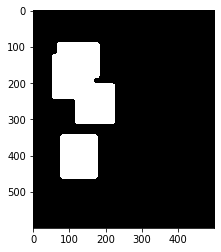

In [3]:
correct = np.array(plt.imread("/data/DATASET_INPAINTING/train/1_gt.png"))
corrupt = np.array(plt.imread("/data/DATASET_INPAINTING/train/1.png"))

mask = get_mask(correct, corrupt)

plt.imshow(mask, cmap="gray")

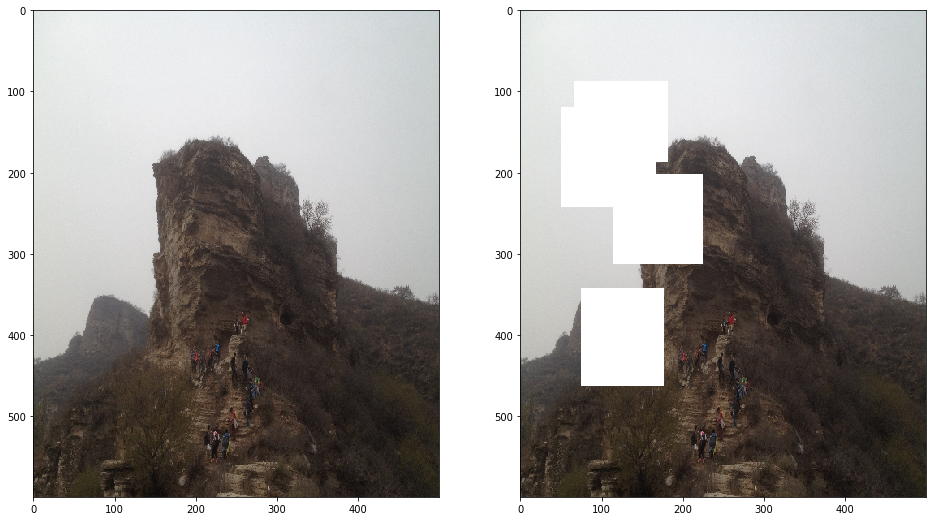

In [4]:
fig = plt.figure(figsize=(16, 16))

fig.add_subplot(1, 2, 1)
plt.imshow(correct, cmap="gray")

fig.add_subplot(1, 2, 2)
plt.imshow(corrupt, cmap="gray")

In [5]:
# Extract masks from all images in directory

correct_images_dir = "/data/mask_extract/train/correct"
corrupt_images_dir = "/data/mask_extract/train/corrupt"
masks_out_dir = "/data/mask_extract/train"

images = np.array(os.listdir(correct_images_dir))
images.sort()

images_amount = len(images)
batch_size = 50

hist = np.array([])
for i in range(0, images_amount, batch_size):
    batch = images[i:i + batch_size]
    for image_file in batch:
        correct = np.array(plt.imread(f"{correct_images_dir}/{image_file}"))
        corrupt = np.array(plt.imread(f"{corrupt_images_dir}/{image_file}"))

        plt.imsave(f"{masks_out_dir}/{image_file}",
                   get_mask(correct, corrupt),
                   cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: '/data/mask_extract/train/correct'

## Mask extraction with OpenCV

In [17]:
def extract_mask_cv(masked_image):
    imgray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(imgray, 254, 255, cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2]
    mask = np.zeros(img.shape, np.uint8)
    cv2.fillPoly(mask, contours, color=(255, 255, 255))
    return mask
    
def extract_mask(masked_image, algorithm='cv'):
    if algorithm == 'cv':
        return extract_mask_cv(masked_image)
    else:
        raise Exception(f'Unknown algorihtm {algorithm}')

True

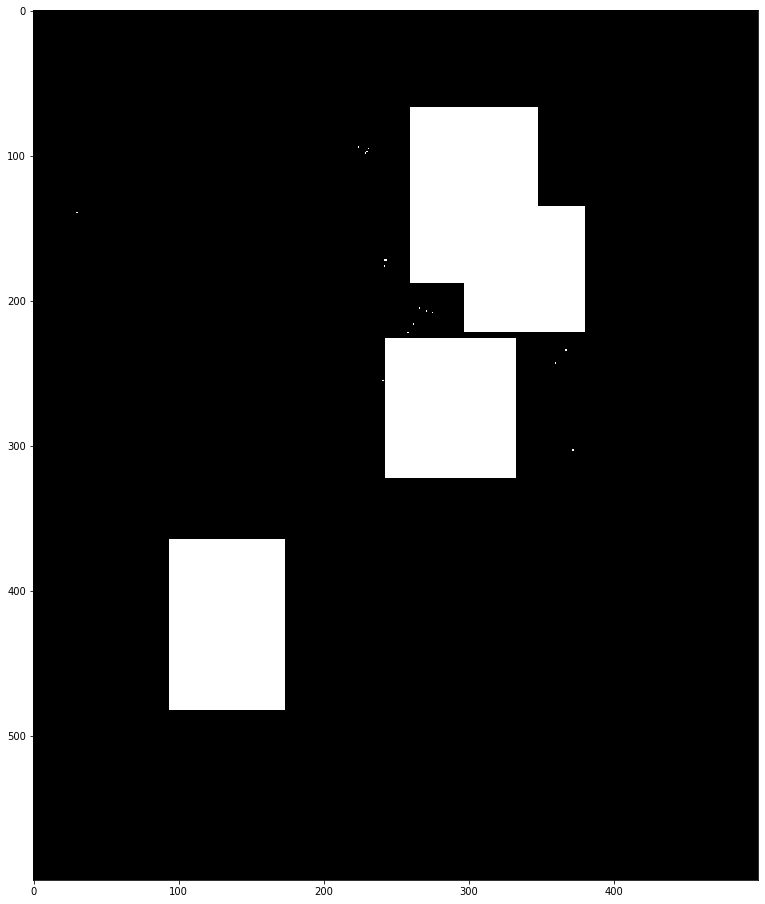

In [31]:
im = cv2.imread('/data/DATASET_INPAINTING/train/4.png')
plt.imshow(get_mask_cv(im))

cv2.imwrite('../test/gavno.png', get_mask_cv(im))

In [136]:
img = cv2.imread(str('/data/DATASET_INPAINTING/test/802.png'))
mask = torch.Tensor(extract_mask(img))[0,:,:]

img = transforms.ToTensor()(Image.open('/data/DATASET_INPAINTING/test/802.png'))
img = torch.unsqueeze(img,dim=0)

mask = torch.unsqueeze(mask,dim=0)
mask = torch.unsqueeze(mask,dim=0)

print(f'img.shape: {img.shape}', f'mask.shape: {mask_t.shape}', sep='\n')

img.shape: torch.Size([1, 3, 600, 500])
mask.shape: torch.Size([1, 1, 600, 500])


In [137]:
x_mask = x - x * mask_t

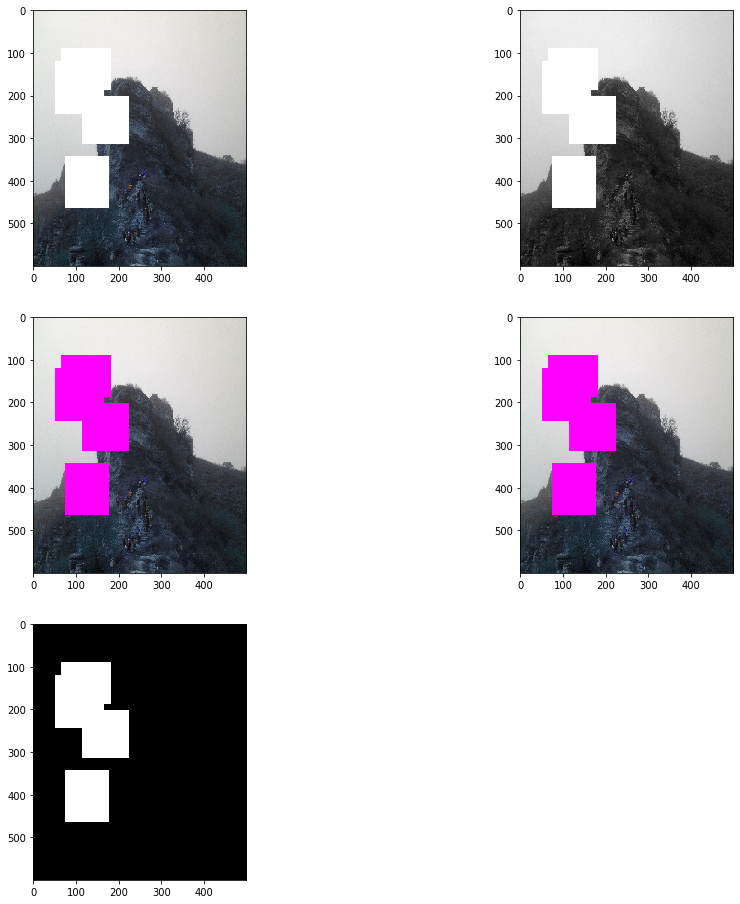

In [6]:
fig = plt.figure(figsize=(16, 16))

im = cv2.imread('/data/DATASET_INPAINTING/test/802.png')
fig.add_subplot(3, 2, 1)
plt.imshow(im)
imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

fig.add_subplot(3, 2, 2)
plt.imshow(imgray, cmap="gray")
ret, thresh = cv2.threshold(imgray, 254, 255, cv2.THRESH_BINARY)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2]
#for contour in contours:
#   cv2.drawContours(im, contour, -1, (255, 0, 0), 3)
cv2.fillPoly(im, contours, color=(255, 0, 255))

fig.add_subplot(3, 2, 3)
plt.imshow(im)
cv2.fillPoly(im, contours, color=(255, 0, 255))

fig.add_subplot(3, 2, 4)
plt.imshow(im)

mask = np.zeros(im.shape, np.uint8)
#cv2.drawContours(mask, contours, -1, 255,1)
cv2.fillPoly(mask, contours, color=(255, 255, 255))
fig.add_subplot(3, 2, 5)
plt.imshow(mask)